credentials were not supplied. open data access only
credentials were not supplied. open data access only
['Italy', 'Spain']
[nan, 'Ciro Immobile', 'Domenico Berardi', 'Matteo Pessina', 'Jorge Luiz Frello Filho', 'Rodrigo Hernández Cascante', 'Daniel Olmo Carvajal', 'Rafael Tolói', 'Jorge Resurrección Merodio', 'Marcos Llorente Moreno', 'Giorgio Chiellini', 'Thiago Alcântara do Nascimento', 'Lorenzo Insigne', 'Unai Simón Mendibil', 'Andrea Belotti', 'Emerson Palmieri dos Santos', 'Pau Francisco Torres', 'Manuel Locatelli', 'Gianluigi Donnarumma', 'Leonardo Bonucci', 'César Azpilicueta Tanco', 'Sergio Busquets i Burgos', 'Federico Chiesa', 'Giovanni Di Lorenzo', 'Eric García Martret', 'Marco Verratti', 'Federico Bernardeschi', 'Pedro González López', 'Ferrán Torres García', 'Nicolò Barella', 'Álvaro Borja Morata Martín', 'Aymeric Laporte', 'Gerard Moreno Balaguero', 'Mikel Oyarzabal Ugarte', 'Jordi Alba Ramos']
16


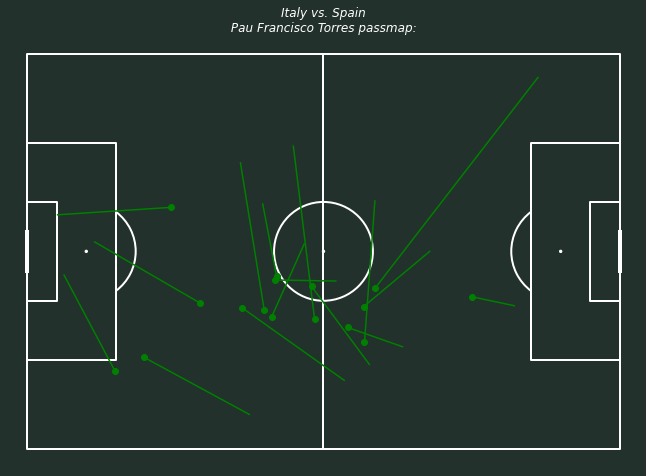

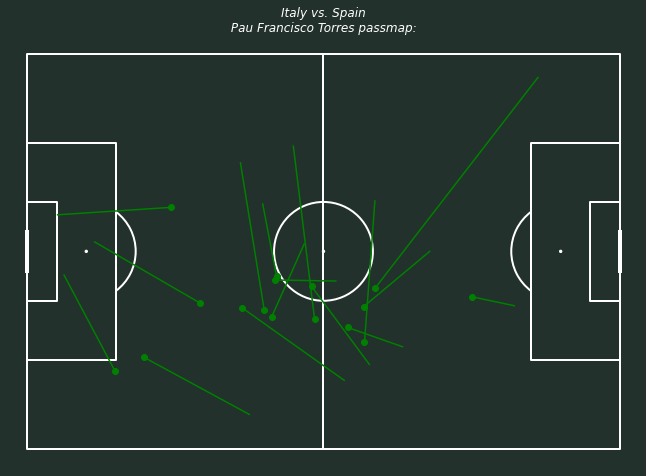

In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

fig1, ax = plt.subplots(figsize=(13.5,8))
fig1.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#22312b',  line_color='white',
            figsize=(16,11), constrained_layout=True, tight_layout=False)  # optional stripes
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#print(sb.competitions())
matches = sb.matches(competition_id=55, season_id=43)
events = sb.events(match_id = 3795220)

teams = list(set(events.team))
print(teams)
print(list(set(events.player)))
events = events[['player','type','location', 'pass_end_location', 'pass_outcome']]
events = events[events['player']=='Pau Francisco Torres' ]
events = events[events['type']=='Pass' ]

print(len(events))
title = plt.title("{} vs. {}\n {} passmap: ".format(teams[0], teams[1], " ".join(str(x) for x in set(events.player))),
        fontsize=12,
        pad='2.0',
        fontstyle='italic' )


plt.setp(title, color='w')

for (start_location, end_location, outcome) in zip(events.location, events.pass_end_location, events.pass_outcome):
    if outcome != 'Incomplete':
        plt.plot((start_location[0], end_location[0]),(start_location[1], end_location[1]), color = 'green')
        plt.scatter(start_location[0], start_location[1], color='green')
    else:
        plt.plot((start_location[0], end_location[0]),(start_location[1], end_location[1]), color = 'red')
        plt.scatter(start_location[0], start_location[1], color='red')

name = str(teams)
#plt.savefig('Passmaps/'+name+'.png')
#events.head(40)
display(fig1)